In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt

In [14]:
#DATASETS = ['A','B','C','D','E','F']
DATASETS = ['A','B','D','E']
datalist = []

for dataset in DATASETS:
    files = [i[:-4] for i in os.listdir(f'../data/{dataset}/formatted/') if i.find('.npy')!=-1]
    for file in files:
        datalist.append(f'../data/{dataset}/formatted/'+file)



# Check the length fits json and numpy

In [15]:
for data in tqdm(datalist):
    signal = np.load(data+'.npy')
    meta = json.load(open(data+'.json'))
    
    if meta['shape'][0] != signal.shape[0]:
        break
    

100%|██████████| 32683/32683 [03:15<00:00, 167.02it/s]


# Check the length distribution, all datasets

100%|██████████| 32683/32683 [02:41<00:00, 201.78it/s]


<AxesSubplot:>

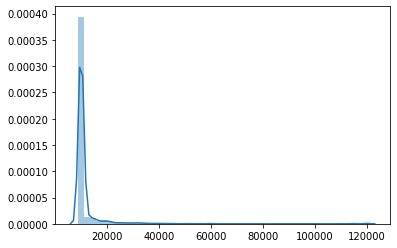

In [17]:
length_list = []
exclusions = []
exclusions_labels = []
exclusions_digits = []

for data in tqdm(datalist):
    meta = json.load(open(data+'.json'))
    if meta['labels_training_merged'] is None:
        continue
    if meta['shape'][0] > 38000:
        file_name = data.split('/')     
        exclusions.append(file_name[-1])
        exclusions_labels.append(meta['labels_full'])
        exclusions_digits.append(meta['labels_training_merged'])
    length_list.append(meta['shape'][0])

    
sns.distplot(length_list)

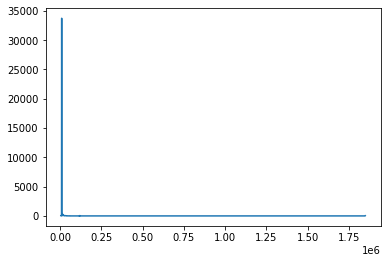

In [21]:
hist = np.histogram(length_list,2000)
plt.plot(hist[1][:-1][:100],hist[0])

In [19]:
np.percentile(length_list,99)

41037.78000000001

# Check distribution of classes, calculate weights

In [20]:
labels = []

for data in tqdm(datalist):
    meta = json.load(open(data+'.json'))
    if meta['shape'][0] > 38000:
        continue
    elif meta['labels_training_merged'] is None:
        continue
    else:
        labels.append(meta['labels_training_merged'])
    

    
labels = np.array(labels)

100%|██████████| 32683/32683 [02:43<00:00, 200.26it/s]


In [28]:
weights = np.sum(labels,axis=0)
weights = weights/np.max(weights)
weights = 1/weights
weights
#weights = weights/np.max(weights)
weights.tolist()

/home/dmitriishubin/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[11.793296089385475,
 6.692145121521662,
 155.72950819672133,
 74.21484375,
 7.72003250711093,
 15.858931552587647,
 11.68450184501845,
 3.6919937815779247,
 23.66002490660025,
 104.39010989010988,
 23.958385876418664,
 63.54180602006689,
 15.611339359079702,
 107.33898305084746,
 55.87941176470588,
 155.72950819672133,
 34.60655737704918,
 55.229651162790695,
 inf,
 24.295396419437342,
 27.980854197349043,
 1.0,
 17.008952551477172,
 inf,
 8.02661596958175,
 63.54180602006689,
 inf]